# Introduction

### FEATURES 
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

<span style='color:MediumVioletRed'><font size="4">Importing the necessary library </span><br></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [2]:
flight = pd.read_csv("flight dataset.csv") 

In [3]:
flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Info about dataset

In [4]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


***Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities.***

>***There are 300261 datapoints and 11 features in the cleaned dataset.***

In [5]:
# Dropping the useless column 'Unnamed: 0'

flight=flight.drop('Unnamed: 0',axis=1)

In [6]:
flight.isnull().sum()         ##Finding the null values

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

**Dataset has zero null values.**

In [7]:
print(f"Dataset has {flight.duplicated().sum()} duplicated values.")            ##Finding the duplicate values

Dataset has 0 duplicated values.


In [8]:
flight['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [9]:
flight['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [10]:
#statistical description 

flight.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


##### Finding the corr between numerical data type

In [11]:
flight.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


### Gaining insights of the dataset

In [12]:
flight['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

><span style='color:MediumVioletRed'></span>
<span style='color:MediumVioletRed'><font size="2">Vistara becoming the most popular flight option. </span><br></font>

D:\AnaConda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


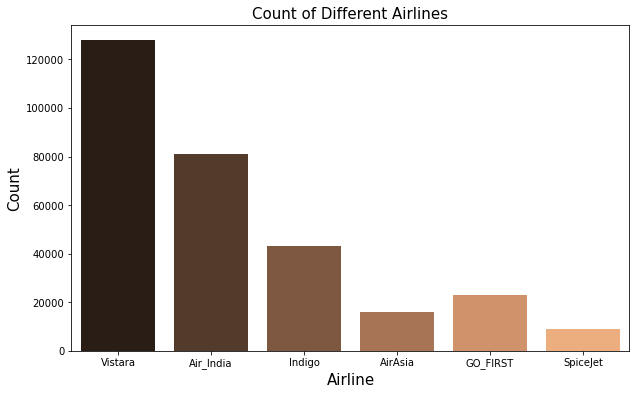

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(flight['airline'].sort_index(ascending=False),palette='copper')
plt.title('Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [14]:
flight['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

D:\AnaConda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


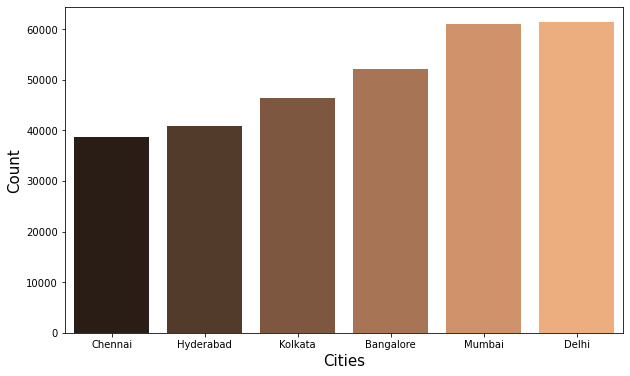

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(flight['source_city'].sort_index(ascending=False),palette='copper')
# plt.title('Count o',fontsize=15)
plt.xlabel('Cities',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [16]:
flight['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

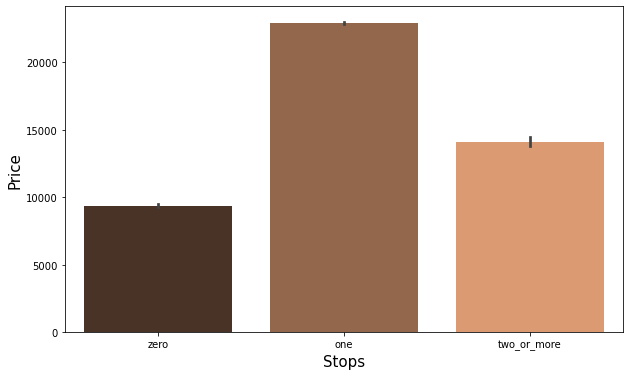

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=flight['stops'], y=flight['price'] ,palette='copper')
# plt.title('Count o',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

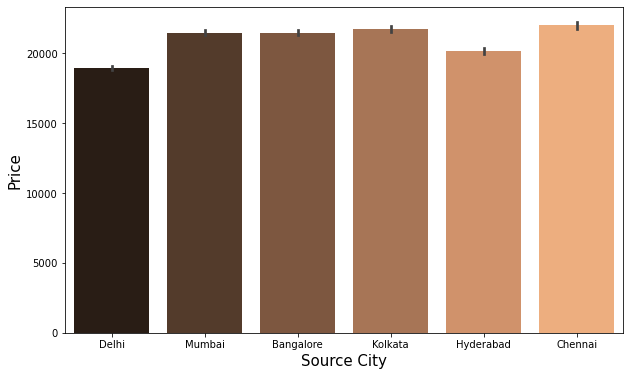

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=flight['source_city'], y=flight['price'] ,palette='copper')
# plt.title('Count o',fontsize=15)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

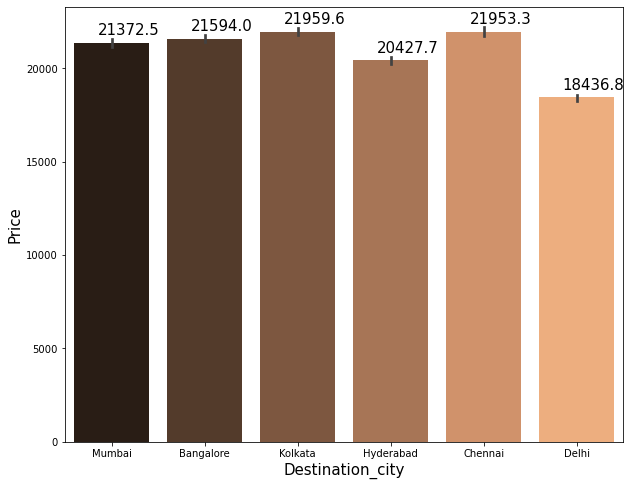

In [19]:
plt.figure(figsize=(10,8))
plot5 = sns.barplot(x=flight['destination_city'], y=flight['price'] ,palette='copper')
# plt.title('Count o',fontsize=15)
plt.xlabel('Destination_city',fontsize=15)
plt.ylabel('Price',fontsize=15)

for p in plot5.patches:
   plot5.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01),size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

><span style='color:RebeccaPurple'><font size="2"> Not Much difference of ticketing fares when comes to destination. </span><br></font>

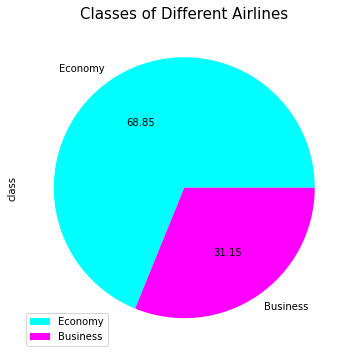

In [20]:
plt.figure(figsize=(8,6))
flight['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()


<span style='color:RebeccaPurple'><font size="2"> Most preferred class is Economic Class </span><br></font>

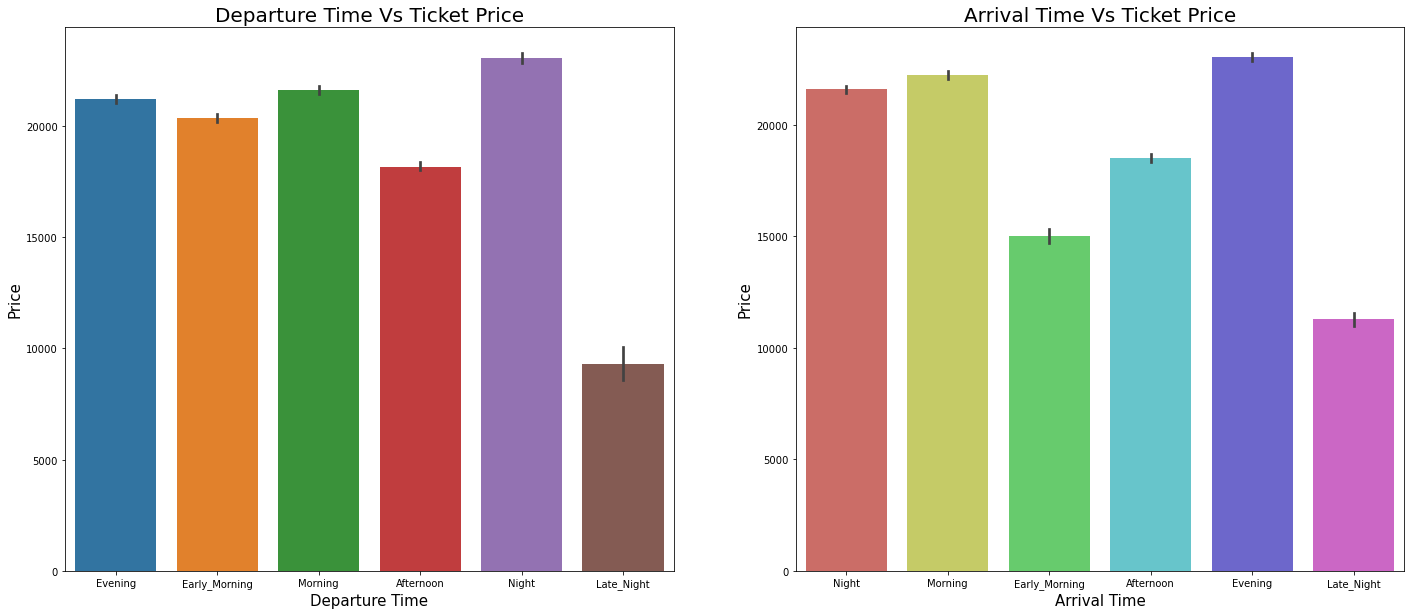

In [21]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.barplot(x='departure_time',y='price',data=flight)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.barplot(x='arrival_time',y='price',data=flight,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

 **Pricing Change On Departure Time and Arrival time**

**Departure Time**

><span style='color:DarkMagenta'> Pricing of Night flights is more</span><br>
><span style='color:DarkMagenta'> Ticketing is almost equal Early_morning, Morning, Evening flights </span><br>
><span style='color:DarkMagenta'> Late nights flights have lowest fares </span><br> 
___
**Arrival Time**

><span style='color:Teal'> Pricing of Evening flights is more</span><br>
><span style='color:Teal'> Ticketing is almost equal Morning, Night flights </span><br>
><span style='color:Teal'> Early_Morning, Late nights flights have lowest fares </span><br> 

## Data Preprocessing

**Creating a backup file**

In [22]:
df_back=flight.copy()

In [23]:
## Converting the categorical into numerical categorical by labelencoder
from sklearn.preprocessing import LabelEncoder

df_lab=LabelEncoder() ##Creating Variable for encoding

In [24]:
for col in flight.columns:
    if flight[col].dtype=='object':
        flight[col]=df_lab.fit_transform(flight[col])
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [25]:
x=flight.drop(['price'],axis=1)
y=flight['price'] 

In [26]:
##Splitting the test train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print('X Train:',X_train.shape)
print('X Test:',X_test.shape)
print('y Train:',y_train.shape)
print('y Test:',y_test.shape)

X Train: (201102, 10)
X Test: (99051, 10)
y Train: (201102,)
y Test: (99051,)


In [27]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmScalar= MinMaxScaler()
X_train=mmScalar.fit_transform(X_train)
X_test=mmScalar.fit_transform(X_test)
X_train.shape                         

(201102, 10)

### **Building the Regressor / RegressorModels**

In [28]:
##Importing the models
from sklearn.linear_model import LinearRegression ##Linear regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

## Creating variables for different Models
model_lr= LinearRegression()

model_ri= Ridge()

model_La= Lasso(alpha=1.0)

model_svr= SVR()

model_dtree= DecisionTreeRegressor()

model_rf= RandomForestRegressor()

In [29]:
##Linear Regression
print('---Linear Regressor---')
model_lr.fit(X_train, y_train)
LinearRegression()
print(50*'--')

## Rigde Regressor
print('---Ridge Regressor---')
model_ri.fit(X_train, y_train)
Ridge()
print(50*'--')

## Lasso Regressor
print('---Lasso Regressor---')
model_La.fit(X_train, y_train)
Lasso()
print(50*'--')

## Support Vector Machine
print('---Support Vector Machine Regressor---')
model_svr.fit(X_train, y_train)
SVR()
print(50*'--')

# Decision Tree Regressor
print('---Decision Tree Regressor---')
model_dtree.fit(X_train, y_train)
DecisionTreeRegressor()
print(50*'--')

##Random forest Regressor
print('---Random Forest Regressor---')
model_rf.fit(X_train,y_train)
RandomForestRegressor()

---Linear Regressor---
----------------------------------------------------------------------------------------------------
---Ridge Regressor---
----------------------------------------------------------------------------------------------------
---Lasso Regressor---
----------------------------------------------------------------------------------------------------
---Support Vector Machine Regressor---
----------------------------------------------------------------------------------------------------
---Decision Tree Regressor---
----------------------------------------------------------------------------------------------------
---Random Forest Regressor---


RandomForestRegressor()

**Predicting Test data**

In [30]:
## Predicting Test data with different Regressor Models
print('----Linear Regressor----')

price_pred_lr=model_lr.predict(X_test)

print('---Ridge Regressor---')

price_pred_ri=model_ri.predict(X_test)

print('---Lasso Regressor---')

price_pred_La=model_La.predict(X_test)

print('---Support vector Regressor---')

price_pred_svr=model_svr.predict(X_test)

print('---Decision Tree Regressor---')

price_pred_dtree=model_dtree.predict(X_test)

print('---Random Tree Regressor---')

price_pred_rf=model_rf.predict(X_test)

----Linear Regressor----
---Ridge Regressor---
---Lasso Regressor---
---Support vector Regressor---
---Decision Tree Regressor---
---Random Tree Regressor---


**Evaluating the results of models**

In [31]:

print('---Linear Regressor---')
print("R2 Score: ",r2_score(y_test,price_pred_lr))
print("Mean Squared Error: ",mean_squared_error(y_test, price_pred_lr))
print('Mean Absolute Error', mean_absolute_error(y_test,price_pred_lr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, price_pred_lr)))
print('Root_Mean_Squared_Log_Error_RMSLE:',np.log(np.sqrt(mean_squared_error(y_test, price_pred_lr))))
print('Adjusted R squared:',1 - (1-r2_score(y_test, price_pred_lr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('\n')
print('---Ridge Regressor---')
print("R2 Score: ",r2_score(y_test,price_pred_ri))
print("Mean Squared Error: ",mean_squared_error(y_test, price_pred_ri))
print('Mean Absolute Error', mean_absolute_error(y_test,price_pred_ri))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, price_pred_ri)))
print('Root_Mean_Squared_Log_Error_RMSLE:',np.log(np.sqrt(mean_squared_error(y_test, price_pred_ri))))
print('Adjusted R squared:',1 - (1-r2_score(y_test, price_pred_ri))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('\n')

print('---Lasso Regressor---')
print("R2 Score: ",r2_score(y_test, price_pred_La))
print("Mean Squared Error: ",mean_squared_error(y_test, price_pred_La))
print('Mean Absolute Error', mean_absolute_error(y_test,price_pred_La))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, price_pred_La)))
print('Root_Mean_Squared_Log_Error_RMSLE:',np.log(np.sqrt(mean_squared_error(y_test, price_pred_La))))
print('Adjusted R squared:',1 - (1-r2_score(y_test, price_pred_La))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('\n')

print('---Decision Regressor---')
print("R2 Score: ",r2_score(y_test, price_pred_dtree))
print("Mean Squared Error: ",mean_squared_error(y_test, price_pred_dtree))
print('Mean Absolute Error', mean_absolute_error(y_test,price_pred_dtree))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, price_pred_dtree)))
print('Root_Mean_Squared_Log_Error_RMSLE:',np.log(np.sqrt(mean_squared_error(y_test, price_pred_dtree))))
print('Adjusted R squared:',1 - (1-r2_score(y_test, price_pred_dtree))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('\n')

print('---SVR Regressor---')
print("R2 Score: ",r2_score(y_test, price_pred_svr))
print("Mean Squared Error: ",mean_squared_error(y_test, price_pred_svr))
print('Mean Absolute Error', mean_absolute_error(y_test, price_pred_svr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, price_pred_svr)))
print('Root_Mean_Squared_Log_Error_RMSLE:',np.log(np.sqrt(mean_squared_error(y_test, price_pred_svr))))
print('Adjusted R squared:',1 - (1-r2_score(y_test, price_pred_svr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('\n')

print('---Random Forest Regressor---')
print("R2 Score: ",r2_score(y_test, price_pred_rf))
print("Mean Squared Error: ",mean_squared_error(y_test, price_pred_rf))
print('Mean Absolute Error', mean_absolute_error(y_test, price_pred_rf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, price_pred_rf)))
print('Root_Mean_Squared_Log_Error_RMSLE:',np.log(np.sqrt(mean_squared_error(y_test, price_pred_rf))))
print('Adjusted R squared:',1 - (1-r2_score(y_test, price_pred_rf))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

---Linear Regressor---
R2 Score:  0.9049331960501108
Mean Squared Error:  49047649.62429508
Mean Absolute Error 4630.904132400213
Root Mean Squared Error: 7003.402717557736
Root_Mean_Squared_Log_Error_RMSLE: 8.854151412436147
Adjusted R squared: 0.9049235972209559


---Ridge Regressor---
R2 Score:  0.9049332432733973
Mean Squared Error:  49047625.26046756
Mean Absolute Error 4630.924670894027
Root Mean Squared Error: 7003.400978129665
Root_Mean_Squared_Log_Error_RMSLE: 8.854151164067126
Adjusted R squared: 0.9049236444490105


---Lasso Regressor---
R2 Score:  0.9049348929718497
Mean Squared Error:  49046774.13443499
Mean Absolute Error 4629.826797028502
Root Mean Squared Error: 7003.3402126724495
Root_Mean_Squared_Log_Error_RMSLE: 8.854142487465426
Adjusted R squared: 0.9049252943140318


---Decision Regressor---
R2 Score:  0.9819088309275907
Mean Squared Error:  9333745.1675049
Mean Absolute Error 938.9209481310976
Root Mean Squared Error: 3055.1178647484126
Root_Mean_Squared_Log_Erro

**From the Above Results, The Top 3 Models by comparing Errors , Adj_R_Square and R2_Score values are**

>**1. Random Forest Regressor 2. Decision tree Regressor**

**Training the Data with Random Forest Regressor**

In [32]:
##Training the model with
# model_rf.fit(X_train,y_train)

##Predicting the Test Data
y_pred=model_rf.predict(X_test)

In [33]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_back.merge(out,left_index=True,right_index=True)

In [34]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
230053,Air_India,AI-806,Mumbai,Early_Morning,one,Evening,Bangalore,Business,8.25,2,65506,65506,60641.51
128984,Indigo,6E-725,Kolkata,Evening,one,Early_Morning,Mumbai,Economy,9.92,12,9251,9251,7939.86
192907,Indigo,6E-5347,Chennai,Night,zero,Late_Night,Mumbai,Economy,2.08,42,3000,3000,3000.00
292687,Vistara,UK-832,Chennai,Early_Morning,one,Night,Mumbai,Business,15.92,38,49553,49553,49871.08
34624,SpiceJet,SG-8946,Delhi,Morning,one,Afternoon,Hyderabad,Economy,26.33,44,8100,8100,8254.26
183342,SpiceJet,SG-4010,Chennai,Morning,one,Morning,Delhi,Economy,24.33,23,4048,4048,4048.00
252748,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,Business,14.00,48,74844,74844,74802.28
285897,Vistara,UK-870,Hyderabad,Night,one,Evening,Chennai,Business,19.75,14,51707,51707,55825.82
36724,Vistara,UK-953,Delhi,Night,one,Morning,Chennai,Economy,15.17,12,11520,11520,11563.22
216190,Air_India,AI-485,Delhi,Early_Morning,one,Morning,Kolkata,Business,29.17,7,48882,48882,48882.00


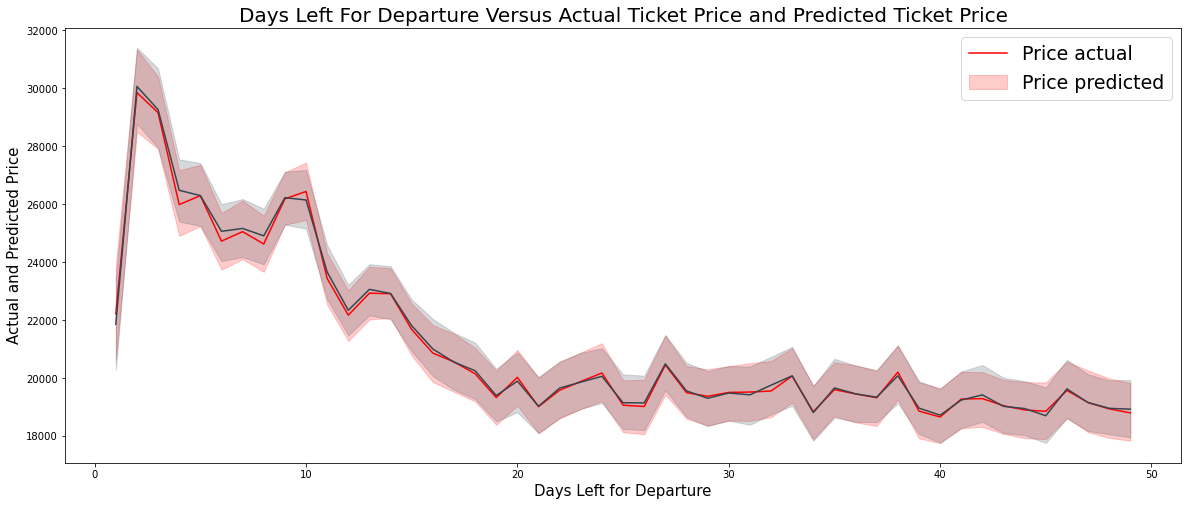

In [35]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='#36454F')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

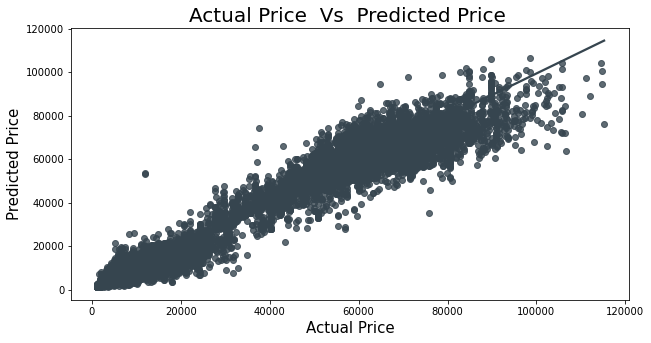

In [36]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='#36454F')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)

plt.show()

<span style='color:RebeccaPurple'><font size="3"> Conclusions:</span><br></font>
<span style='color:DarkCyan'><font size="1">As we can see from above graphs that our model prediction works well with our actual price. </span><br></font>
<span style='color:DarkCyan'><font size="1.5">Random Forest regressor have signiificant high score which makes it a best model.</span><br></font>
<span style='color:DarkCyan'><font size="2">Random Forest regressor is our final model.</span><br></font>